# Initialization

In [1]:
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [3]:
#Data Dictionary

data_dictionary = []
data_dictionary.append({"name":"acc_now_delinq","desc":"The number of accounts on which the borrower is now delinquent."})
data_dictionary.append({"name":"acc_open_past_24mths","desc":"Number of trades opened in past 24 months."})
data_dictionary.append({"name":"addr_state","desc":"The state provided by the borrower in the loan application"})
data_dictionary.append({"name":"all_util","desc":"Balance to credit limit on all trades"})
data_dictionary.append({"name":"annual_inc","desc":"The self-reported annual income provided by the borrower during registration."})
data_dictionary.append({"name":"annual_inc_joint","desc":"The combined self-reported annual income provided by the co-borrowers during registration"})
data_dictionary.append({"name":"application_type","desc":"Indicates whether the loan is an individual application or a joint application with two co-borrowers"})
data_dictionary.append({"name":"avg_cur_bal","desc":"Average current balance of all accounts"})
data_dictionary.append({"name":"bc_open_to_buy","desc":"Total open to buy on revolving bankcards."})
data_dictionary.append({"name":"bc_util","desc":"Ratio of total current balance to high credit/credit limit for all bankcard accounts."})
data_dictionary.append({"name":"chargeoff_within_12_mths","desc":"Number of charge-offs within 12 months"})
data_dictionary.append({"name":"collection_recovery_fee","desc":"post charge off collection fee"})
data_dictionary.append({"name":"collections_12_mths_ex_med","desc":"Number of collections in 12 months excluding medical collections"})
data_dictionary.append({"name":"delinq_2yrs","desc":"The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years"})
data_dictionary.append({"name":"delinq_amnt","desc":"The past-due amount owed for the accounts on which the borrower is now delinquent."})
data_dictionary.append({"name":"desc","desc":"Loan description provided by the borrower"})
data_dictionary.append({"name":"dti","desc":"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."})
data_dictionary.append({"name":"dti_joint","desc":"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"})
data_dictionary.append({"name":"earliest_cr_line","desc":"The month the borrower's earliest reported credit line was opened"})
data_dictionary.append({"name":"emp_length","desc":"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. "})
data_dictionary.append({"name":"emp_title","desc":"The job title supplied by the Borrower when applying for the loan.*"})
data_dictionary.append({"name":"funded_amnt","desc":"The total amount committed to that loan at that point in time."})
data_dictionary.append({"name":"funded_amnt_inv","desc":"The total amount committed by investors for that loan at that point in time."})
data_dictionary.append({"name":"grade","desc":"LC assigned loan grade"})
data_dictionary.append({"name":"home_ownership","desc":"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."})
data_dictionary.append({"name":"id","desc":"A unique LC assigned ID for the loan listing."})
data_dictionary.append({"name":"il_util","desc":"Ratio of total current balance to high credit/credit limit on all install acct"})
data_dictionary.append({"name":"initial_list_status","desc":"The initial listing status of the loan. Possible values are – W, F"})
data_dictionary.append({"name":"inq_fi","desc":"Number of personal finance inquiries"})
data_dictionary.append({"name":"inq_last_12m","desc":"Number of credit inquiries in past 12 months"})
data_dictionary.append({"name":"inq_last_6mths","desc":"The number of inquiries in past 6 months (excluding auto and mortgage inquiries)"})
data_dictionary.append({"name":"installment","desc":"The monthly payment owed by the borrower if the loan originates."})
data_dictionary.append({"name":"int_rate","desc":"Interest Rate on the loan"})
data_dictionary.append({"name":"issue_d","desc":"The month which the loan was funded"})
data_dictionary.append({"name":"last_credit_pull_d","desc":"The most recent month LC pulled credit for this loan"})
data_dictionary.append({"name":"last_pymnt_amnt","desc":"Last total payment amount received"})
data_dictionary.append({"name":"last_pymnt_d","desc":"Last month payment was received"})
data_dictionary.append({"name":"loan_amnt","desc":"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."})
data_dictionary.append({"name":"loan_status","desc":"Current status of the loan"})
data_dictionary.append({"name":"max_bal_bc","desc":"Maximum current balance owed on all revolving accounts"})
data_dictionary.append({"name":"member_id","desc":"A unique LC assigned Id for the borrower member."})
data_dictionary.append({"name":"mo_sin_old_il_acct","desc":"Months since oldest bank installment account opened"})
data_dictionary.append({"name":"mo_sin_old_rev_tl_op","desc":"Months since oldest revolving account opened"})
data_dictionary.append({"name":"mo_sin_rcnt_rev_tl_op","desc":"Months since most recent revolving account opened"})
data_dictionary.append({"name":"mo_sin_rcnt_tl","desc":"Months since most recent account opened"})
data_dictionary.append({"name":"mort_acc","desc":"Number of mortgage accounts."})
data_dictionary.append({"name":"mths_since_last_delinq","desc":"The number of months since the borrower's last delinquency."})
data_dictionary.append({"name":"mths_since_last_major_derog","desc":"Months since most recent 90-day or worse rating"})
data_dictionary.append({"name":"mths_since_last_record","desc":"The number of months since the last public record."})
data_dictionary.append({"name":"mths_since_rcnt_il","desc":"Months since most recent installment accounts opened"})
data_dictionary.append({"name":"mths_since_recent_bc","desc":"Months since most recent bankcard account opened."})
data_dictionary.append({"name":"mths_since_recent_bc_dlq","desc":"Months since most recent bankcard delinquency"})
data_dictionary.append({"name":"mths_since_recent_inq","desc":"Months since most recent inquiry."})
data_dictionary.append({"name":"mths_since_recent_revol_delinq","desc":"Months since most recent revolving delinquency."})
data_dictionary.append({"name":"next_pymnt_d","desc":"Next scheduled payment date"})
data_dictionary.append({"name":"num_accts_ever_120_pd","desc":"Number of accounts ever 120 or more days past due"})
data_dictionary.append({"name":"num_actv_bc_tl","desc":"Number of currently active bankcard accounts"})
data_dictionary.append({"name":"num_actv_rev_tl","desc":"Number of currently active revolving trades"})
data_dictionary.append({"name":"num_bc_sats","desc":"Number of satisfactory bankcard accounts"})
data_dictionary.append({"name":"num_bc_tl","desc":"Number of bankcard accounts"})
data_dictionary.append({"name":"num_il_tl","desc":"Number of installment accounts"})
data_dictionary.append({"name":"num_op_rev_tl","desc":"Number of open revolving accounts"})
data_dictionary.append({"name":"num_rev_accts","desc":"Number of revolving accounts"})
data_dictionary.append({"name":"num_rev_tl_bal_gt_0","desc":"Number of revolving trades with balance >0"})
data_dictionary.append({"name":"num_sats","desc":"Number of satisfactory accounts"})
data_dictionary.append({"name":"num_tl_120dpd_2m","desc":"Number of accounts currently 120 days past due (updated in past 2 months)"})
data_dictionary.append({"name":"num_tl_30dpd","desc":"Number of accounts currently 30 days past due (updated in past 2 months)"})
data_dictionary.append({"name":"num_tl_90g_dpd_24m","desc":"Number of accounts 90 or more days past due in last 24 months"})
data_dictionary.append({"name":"num_tl_op_past_12m","desc":"Number of accounts opened in past 12 months"})
data_dictionary.append({"name":"open_acc","desc":"The number of open credit lines in the borrower's credit file."})
data_dictionary.append({"name":"open_acc_6m","desc":"Number of open trades in last 6 months"})
data_dictionary.append({"name":"open_il_12m","desc":"Number of installment accounts opened in past 12 months"})
data_dictionary.append({"name":"open_il_24m","desc":"Number of installment accounts opened in past 24 months"})
data_dictionary.append({"name":"open_il_6m","desc":"Number of currently active installment trades"})
data_dictionary.append({"name":"open_rv_12m","desc":"Number of revolving trades opened in past 12 months"})
data_dictionary.append({"name":"open_rv_24m","desc":"Number of revolving trades opened in past 24 months"})
data_dictionary.append({"name":"out_prncp","desc":"Remaining outstanding principal for total amount funded"})
data_dictionary.append({"name":"out_prncp_inv","desc":"Remaining outstanding principal for portion of total amount funded by investors"})
data_dictionary.append({"name":"pct_tl_nvr_dlq","desc":"Percent of trades never delinquent"})
data_dictionary.append({"name":"percent_bc_gt_75","desc":"Percentage of all bankcard accounts > 75% of limit."})
data_dictionary.append({"name":"policy_code","desc":"publicly available policy_code=1 new products not publicly available policy_code=2"})
data_dictionary.append({"name":"pub_rec","desc":"Number of derogatory public records"})
data_dictionary.append({"name":"pub_rec_bankruptcies","desc":"Number of public record bankruptcies"})
data_dictionary.append({"name":"purpose","desc":"A category provided by the borrower for the loan request. "})
data_dictionary.append({"name":"pymnt_plan","desc":"Indicates if a payment plan has been put in place for the loan"})
data_dictionary.append({"name":"recoveries","desc":"post charge off gross recovery"})
data_dictionary.append({"name":"revol_bal","desc":"Total credit revolving balance"})
data_dictionary.append({"name":"revol_util","desc":"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."})
data_dictionary.append({"name":"sub_grade","desc":"LC assigned loan subgrade"})
data_dictionary.append({"name":"tax_liens","desc":"Number of tax liens"})
data_dictionary.append({"name":"term","desc":"The number of payments on the loan. Values are in months and can be either 36 or 60."})
data_dictionary.append({"name":"title","desc":"The loan title provided by the borrower"})
data_dictionary.append({"name":"tot_coll_amt","desc":"Total collection amounts ever owed"})
data_dictionary.append({"name":"tot_cur_bal","desc":"Total current balance of all accounts"})
data_dictionary.append({"name":"tot_hi_cred_lim","desc":"Total high credit/credit limit"})
data_dictionary.append({"name":"total_acc","desc":"The total number of credit lines currently in the borrower's credit file"})
data_dictionary.append({"name":"total_bal_ex_mort","desc":"Total credit balance excluding mortgage"})
data_dictionary.append({"name":"total_bal_il","desc":"Total current balance of all installment accounts"})
data_dictionary.append({"name":"total_bc_limit","desc":"Total bankcard high credit/credit limit"})
data_dictionary.append({"name":"total_cu_tl","desc":"Number of finance trades"})
data_dictionary.append({"name":"total_il_high_credit_limit","desc":"Total installment high credit/credit limit"})
data_dictionary.append({"name":"total_pymnt","desc":"Payments received to date for total amount funded"})
data_dictionary.append({"name":"total_pymnt_inv","desc":"Payments received to date for portion of total amount funded by investors"})
data_dictionary.append({"name":"total_rec_int","desc":"Interest received to date"})
data_dictionary.append({"name":"total_rec_late_fee","desc":"Late fees received to date"})
data_dictionary.append({"name":"total_rec_prncp","desc":"Principal received to date"})
data_dictionary.append({"name":"total_rev_hi_lim","desc":"Total revolving high credit/credit limit"})
data_dictionary.append({"name":"url","desc":"URL for the LC page with listing data."})
data_dictionary.append({"name":"verification_status","desc":"Indicates if income was verified by LC, not verified, or if the income source was verified"})
data_dictionary.append({"name":"verification_status_joint","desc":"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"})
data_dictionary.append({"name":"zip_code","desc":"The first 3 numbers of the zip code provided by the borrower in the loan application."})



In [4]:
def getDescriptionByColumnName(columnNames):
    desc = []
    for data in data_dictionary:
        for columnName in columnNames:        
            if data["name"] == columnName:
                desc.append(data['desc'])
    return desc
    
   

In [5]:
print(getDescriptionByColumnName(["zip_code"]))

['The first 3 numbers of the zip code provided by the borrower in the loan application.']


In [6]:
df_plot = pd.read_csv("loan.csv", low_memory=False)
df_plot.shape

(39717, 111)

In [7]:
# Method to Combine the information into a single DataFrame

def combinedInfo(df_cleaned):
    # Get the count of null values in each column
    null_counts = df_cleaned.isnull().sum()
    # Get the data types of each column
 
    data_types = df_cleaned.dtypes
    description = getDescriptionByColumnName(sorted(df_cleaned.columns.to_list()))
    print(len(description))
    detailed_info = pd.DataFrame({
        'Data Type': data_types,       
        'Non-Null Count': df_cleaned.count(),
        'Null Count': null_counts,
        'Unique Values': df_cleaned.nunique(),
        'Top': df_cleaned.mode().iloc[0],
        'Freq': df_cleaned.apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else np.nan),
    })

    pd.set_option('display.max_rows', None)  # To display all rows
    pd.set_option('display.max_columns', None)  # To display all columns
    pd.set_option('display.max_colwidth', None)  # To display full column width
    pd.set_option('display.expand_frame_repr', False)  # To display wide DataFrames side by side
    
    
    detailed_info = detailed_info.sort_index(axis=0)
    detailed_info.insert(loc=0, column='Description', value = description)

    # return the detailed information
    return detailed_info


In [8]:
combinedInfo(df_plot)

111


,Description,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq
acc_now_delinq,The number of accounts on which the borrower is now delinquent.,int64,39717,0,1,0.0,39717.0
acc_open_past_24mths,Number of trades opened in past 24 months.,float64,0,39717,0,NaN,NaN
addr_state,The state provided by the borrower in the loan application,object,39717,0,50,CA,7099.0
all_util,Balance to credit limit on all trades,float64,0,39717,0,NaN,NaN
annual_inc,The self-reported annual income provided by the borrower during registration.,float64,39717,0,5318,60000.0,1505.0
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,float64,0,39717,0,NaN,NaN
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers,object,39717,0,1,INDIVIDUAL,39717.0
avg_cur_bal,Average current balance of all accounts,float64,0,39717,0,NaN,NaN
bc_open_to_buy,Total open to buy on revolving bankcards.,float64,0,39717,0,NaN,NaN
bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,float64,0,39717,0,NaN,NaN


# Step 1 : Cleaning

In [9]:
# Get the percentage of null values in each column
null_percentage = df_plot.isnull().mean() * 100

# Extract column names with 100% null values
columns_with_nulls = null_percentage[null_percentage >= 75].index.tolist()

columns_with_nulls


['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [10]:
# Drop columns with >=75% null values
df = df_plot.drop(columns=columns_with_nulls)

In [11]:
df.shape

(39717, 55)

In [12]:
df_combined = combinedInfo(df)
df_combined

55


,Description,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq
acc_now_delinq,The number of accounts on which the borrower is now delinquent.,int64,39717,0,1,0.0,39717
addr_state,The state provided by the borrower in the loan application,object,39717,0,50,CA,7099
annual_inc,The self-reported annual income provided by the borrower during registration.,float64,39717,0,5318,60000.0,1505
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers,object,39717,0,1,INDIVIDUAL,39717
chargeoff_within_12_mths,Number of charge-offs within 12 months,float64,39661,56,1,0.0,39661
collection_recovery_fee,post charge off collection fee,float64,39717,0,2616,0.0,35935
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections,float64,39661,56,1,0.0,39661
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,int64,39717,0,11,0.0,35405
delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.,int64,39717,0,1,0.0,39717
desc,Loan description provided by the borrower,object,26775,12942,26526,,210


In [13]:
# identifying columns having null values and trying to impute it.
null_columns = df_combined[df_combined["Null Count"] > 0]
null_columns = null_columns.reset_index()
null_columns = null_columns.rename(columns={'index':'column_name'})

column_type_name_map = null_columns.groupby(by="Data Type")["column_name"].apply(list)
column_type_name_map

Data Type
float64    [chargeoff_within_12_mths, collections_12_mths_ex_med, mths_since_last_delinq, pub_rec_bankruptcies, tax_liens]
object                                  [desc, emp_length, emp_title, last_credit_pull_d, last_pymnt_d, revol_util, title]
Name: column_name, dtype: object

## 1. Observations
### Columns need to be analysed & imputed.
- pub_rec_bankruptcies
- tax_liens
- emp_length
- revol_util

In [14]:
#Getting columns which has only single unique values.
df_combined = combinedInfo(df)
single_valued_columns = df_combined[df_combined["Unique Values"] == 1]
df[single_valued_columns.index].head(2)

55


,acc_now_delinq,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,initial_list_status,policy_code,pymnt_plan,tax_liens
0,0,INDIVIDUAL,0.0,0.0,0,f,1,n,0.0
1,0,INDIVIDUAL,0.0,0.0,0,f,1,n,0.0


## 2. Observation
### Below columns has only single value and thus it will not impact the loan status. We can drop them.
- acc_now_delinq
- application_type
- chargeoff_within_12_mths
- collections_12_mths_ex_med
- delinq_amnt
- initial_list_status
- policy_code
- pymnt_plan
- tax_liens

In [15]:
# #Dropping the single valued columns
df = df.drop(columns=single_valued_columns.index.to_list())
df.shape

(39717, 46)

In [16]:
combinedInfo(df)

46


,Description,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq
addr_state,The state provided by the borrower in the loan application,object,39717,0,50,CA,7099
annual_inc,The self-reported annual income provided by the borrower during registration.,float64,39717,0,5318,60000.0,1505
collection_recovery_fee,post charge off collection fee,float64,39717,0,2616,0.0,35935
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,int64,39717,0,11,0.0,35405
desc,Loan description provided by the borrower,object,26775,12942,26526,,210
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.",float64,39717,0,2868,0.0,183
earliest_cr_line,The month the borrower's earliest reported credit line was opened,object,39717,0,526,Nov-98,370
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.,object,38642,1075,11,10+ years,8879
emp_title,The job title supplied by the Borrower when applying for the loan.*,object,37258,2459,28820,US Army,134
funded_amnt,The total amount committed to that loan at that point in time.,int64,39717,0,1041,10000.0,2741


### Based on above column description, below are some of the columns which looks useful and thus are further divided.

| Customers Location    |
|---------|
| Employment Title (title)  | 
| Employment Length (emp_length)    | 
| Zip Code (zip_code)|
| Description  (desc)| 

<br/>

| Loan Characteristics | 
|---------------|
| Loan Amount (loan_amnt) |
| Funded Amount (funded_amnt) |
| Funded Amount Investment  (funded_amnt_inv) |
| Interest Rate (int_rate) | 
| Loan Status (loan_status) |
| Loan Grade (grade) |
| Loan Issue Date (issue_d) |
| Loan Sub Grade (sub_grade) |
| Income Verification (verification_status) |

<br/>

| Behavior Variables | 
|---------------|
| Delinquency Year -2 (delinq_2yrs)  |
| Debt to income (Dti) |
| Earliest Credit Date (earliest_cr_line) |
| Revolving balance (revol_bal)  |
| Loan Purpose (purpose) |
| Term (term) |
| Annual Income (annual_inc) |
| Employeement Length (annual_inc) |
| Home Ownership (home_ownership) |
| Number of Credit Lines(total_acc) |
| Open Credit Lines (open_acc) |
| Derogatory Record (pub_rec) |
| Record of Bankruptcies (pub_rec_bankruptcies) |
| Revolving Credit Balance(revol_bal) |
| Revolving Utilization Rate (revol_util) |
| Loan Title (title) |

<br/>

| Post Loan Sanction | 
|---------------|
| Total Payment Recieved (total_pymnt)  |
| Investor Payment Received (total_pymnt_inv)   |
| Interest Received (total_rec_int)  | 
| Late Fees Received (total_rec_late_fee)|
| Principal Received (total_rec_prncp) |
| Recovery Fee (collection_recovery_fee)|


## Columns to drop
### Inline similar columns
- State & zipcode, are similar, hence we can drop addr_state column.
### Post Loan Sanction columns
- last_pymnt_amnt, out_prncp, out_prncp_inv, total_pymnt_inv recoveries, total_pymnt, total_pymnt_inv, total_rec_int, total_rec_late_fee, total_rec_prncp : Useful post loan approves
### Row Unique columns
- member_id, id, url, last_credit_pull_d, emp_title : fields not useful in analysis as they all have unique values

In [17]:
df = df.drop(columns = ["addr_state","last_pymnt_amnt","out_prncp_inv", "member_id","id", "url", "total_pymnt", "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", "last_credit_pull_d", "emp_title"])
df.shape

(39717, 33)

### Imputing columns
#### Below columns are having null values, hence we can evaluate whether to drop the null values or impute them.
- emp_length
- title
- revol_util
- pub_rec_bankruptcies
### Below columns are object type, converting it to correct type.
- term : to integer
- int_rate : to float
- loan_status : to category

In [18]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
def imputeEmpLength(empLength):
    empLength = str(empLength).replace("years","").replace("year","").replace("+","").replace("<","").strip()
    return 0 if empLength == "nan" else int(empLength)

df.emp_length = df.emp_length.apply(lambda x: imputeEmpLength(x))

In [20]:
#title value impute
print("Before null impute " + str(len(df[df.title.isnull()].title)))
df.title = df.title.fillna(value=df.title.mode()[0])
print("After null impute " + str(len(df[df.title.isnull()].title)))

Before null impute 11
After null impute 0


In [21]:
#revol_util value impute
print("Before null impute " + str(len(df[df.revol_util.isnull()].revol_util)))
df.revol_util = df.revol_util.fillna(value=df.revol_util.mode()[0])
print("After null impute " + str(len(df[df.revol_util.isnull()].revol_util)))

df.revol_util = df.revol_util.apply(lambda x: round(float(x.replace("%","")),2))
df.revol_util

Before null impute 50
After null impute 0


0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
30       86.90
31       27.40
32       63.60
33       29.30
34       60.50
35       57.20
36       13.30
37       50.40
38       66.50
39       50.00
40       18.10
41       21.00
42       98.10
43       99.00
44       32.50
45       13.40
46       62.10
47       52.30
48       19.50
49       36.40
50       63.70
51       62.00
52       92.90
53       90.80
54       52.10
55       97.60
56       75.10
57       72.70
58       59.10
59       91.20
60       58.90
61       58.90
62       57.40
63       66.90
64       30.10
65       45.90
66       7

In [22]:
print("Before null impute " + str(len(df[df.pub_rec_bankruptcies.isnull()].pub_rec_bankruptcies)))
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(value=df.pub_rec_bankruptcies.value_counts()[0])
print("After null impute " + str(len(df[df.pub_rec_bankruptcies.isnull()].revol_util)))

Before null impute 697
After null impute 0


####  Imputing home_ownership

In [23]:
# converting the column
df["term"] = df["term"].apply(lambda x : int(x.replace(" months","")))
df["int_rate"] = df["int_rate"].apply(lambda x : float(x.replace("%","")))


In [24]:
df['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [25]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

### Imputing issue_d

In [26]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month']= df['issue_d'].dt.month                     
df['issue_year']= df['issue_d'].dt.year        

# Filtering
### Filtering loan_status with Current, as we are only interested in either Fully paid or Charged off

In [27]:
# removing current loan amount
df = df[df.loan_status != "Current"]
df.shape

(38577, 35)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38577 non-null  int64         
 1   funded_amnt              38577 non-null  int64         
 2   funded_amnt_inv          38577 non-null  float64       
 3   term                     38577 non-null  int64         
 4   int_rate                 38577 non-null  float64       
 5   installment              38577 non-null  float64       
 6   grade                    38577 non-null  object        
 7   sub_grade                38577 non-null  object        
 8   emp_length               38577 non-null  int64         
 9   home_ownership           38577 non-null  object        
 10  annual_inc               38577 non-null  float64       
 11  verification_status      38577 non-null  object        
 12  issue_d                  38577 non-nu

In [29]:
df = df.drop(columns=["desc", "title"])
df.shape

(38577, 33)

In [30]:
# df_cleaned = clean_data(df_cleaned)

# Univariate Analysis

In [31]:
def univariate_analysis_numeric(df):
    # Determine the number of numerical and categorical columns
    num_columns = df.select_dtypes(include=['float64','int64']).columns

    print(f"num_columns : {num_columns}")
    # Set up the figure and subplots
    total_columns = len(num_columns)
    fig, axes = plt.subplots(total_columns, 2, figsize=(12, 6 * total_columns))

    if total_columns == 1:
        axes = [axes]

    # Counter to keep track of subplot positions
    pos = 0

    # Numerical Columns Analysis
    for col in num_columns:
        sns.histplot(df[col].dropna(), ax=axes[pos, 0], kde=True)
        axes[pos, 0].set_title(f'Histogram of {col}')
        sns.boxplot(x=df[col].dropna(), ax=axes[pos, 1])
        axes[pos, 1].set_title(f'Boxplot of {col}')
        pos += 1
    plt.tight_layout()
    plt.show()

def univariate_analysis_categorical(df, columns):
    # Select categorical columns
    #cat_columns = df.select_dtypes(include=['object', 'category']).columns
    cat_columns = columns
    
    # Check if there are categorical columns to analyze
    if len(cat_columns) == 0:
        print("No categorical columns to analyze.")
        return
    
    # Set up the figure and subplots
    total_columns = len(cat_columns)
    fig, axes = plt.subplots(total_columns, 1, figsize=(12, 6 * total_columns))
    
    if total_columns == 1:
        axes = [axes]
    
    # Counter to keep track of subplot positions
    pos = 0
    
    for col in cat_columns:
        # Bar Plot
        sns.countplot(y=df[col].dropna(), ax=axes[pos])
        axes[pos].set_title(f'Bar Plot of {col}') 
        #axes[pos].tick_params(axis='x', rotation=90)  # Rotate x-axis labels  
          
        # Pie Chart
        # df[col].dropna().value_counts().plot.pie(ax=axes[pos, 1], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
        # axes[pos, 1].set_title(f'Pie Chart of {col}')
        # axes[pos, 1].set_ylabel('')  # Remove y-label for pie chart
        pos += 1
    plt.tight_layout()
    plt.show()

### Segmented Univariate Analysis

In [32]:
df.shape

(38577, 33)

num_columns : Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'recoveries',
       'collection_recovery_fee', 'pub_rec_bankruptcies'],
      dtype='object')


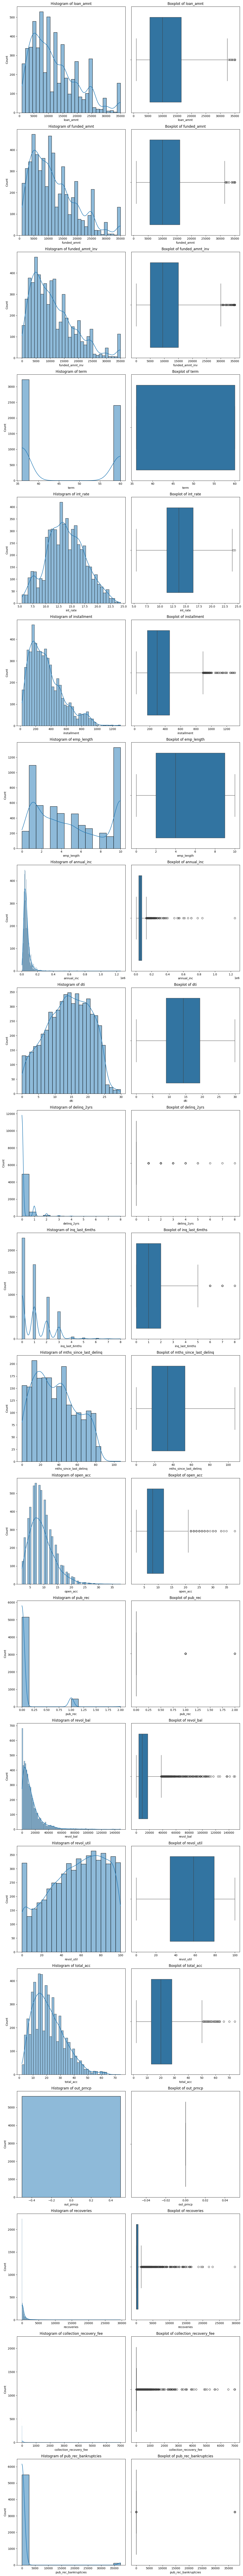

In [33]:
univariate_analysis_numeric(df[df.loan_status == "Charged Off"])

### Observations on univariate segmented numerical analysis.

- Loan Amount: More defaults are happening for loan amount between 5k to 17K, with a mean of 10K. Lets analyse more
- Funded Amount: 5k to 17K 
- Funded Amount Inv: 5k to 17K
- term : default rate is higher 36
- int_rate: 11 to 16%, 13% showing the highest default
- installment : lot of outliers present, default are more between 180 to 420
- emp_length : 0-2 & 10 years more defaulters
- annual_inc : lot of outliers present
- dti : defaulters between 9 to 19 dti
- delinq_2yrs : doesn't show much impact
- mnths_since_last_delinq: delinq_2yrs around 5k records in no delinquency for last 2 years and here we are seeing there is delinquency between 0-20 months as well. Hence delinq data looks incorrect. we can remove them.
- inq_last_6mths: less defaulters if more inquiries, there is a correlation here. Loan given with zero inquiries has highest defaulters.
- open_acc: the chance of default is more if there are credits between 6 to 12
- pub_rec: public derogatory shows no direct impact on defaults, as major default happens with 0 derogatory remarks too
- revol_bal: lot of outliers present.
- revol_util : as the rate increases so does the defaulters, some trend being seen.
- total_acc : more chances of default for credit lines between 11 to 28
- out_prncp : show similar values. can be removed
- recoveris : shows lot of outliers
- collection_recovery_fee : show lot of outliers and looks to be a post charge off formality and can be removed.
- pub_rec_bankruptcies: has no direct impact.


#### Below columns can be removed as no direct impact
- pub_rec_bankruptcies
- pub_rec
- mths_since_last_delinq
- delinq_2yrs
- collection_recovery_fee
- out_prncp



In [34]:
df = df.drop(columns=["pub_rec_bankruptcies", "pub_rec", "mths_since_last_delinq", "delinq_2yrs", "collection_recovery_fee","out_prncp"])
df.shape

(38577, 27)

In [35]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df['revol_util_groups'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [36]:
category_columns = ['grade', 'home_ownership', 'verification_status',
       'issue_year', 'issue_month', 'loan_status', 'purpose',
       'int_rate_groups',
       'open_acc_groups', 'revol_util_groups', 'total_acc_groups',
       'annual_inc_groups', 'installment_groups','funded_amnt_inv_group', 'loan_amnt_groups','dti_groups']
category_columns

['grade',
 'home_ownership',
 'verification_status',
 'issue_year',
 'issue_month',
 'loan_status',
 'purpose',
 'int_rate_groups',
 'open_acc_groups',
 'revol_util_groups',
 'total_acc_groups',
 'annual_inc_groups',
 'installment_groups',
 'funded_amnt_inv_group',
 'loan_amnt_groups',
 'dti_groups']

In [37]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [38]:
df.sub_grade = df.sub_grade.astype(str)
df.sub_grade.dtype

dtype('O')

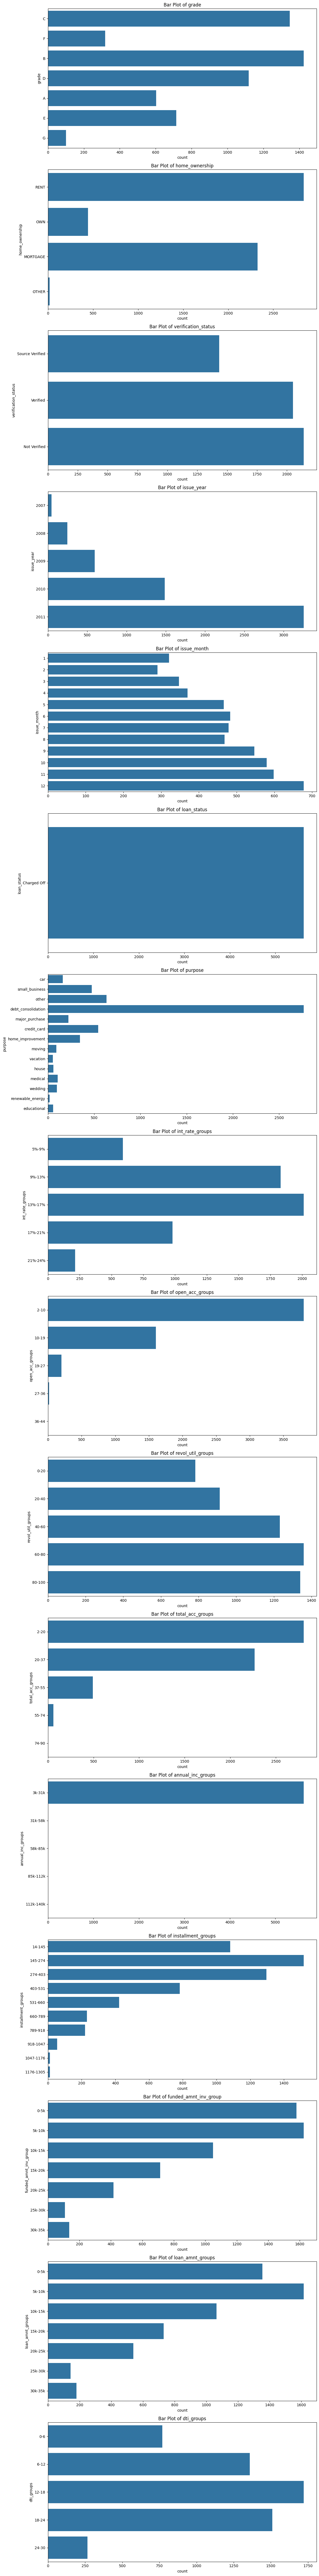

In [39]:
univariate_analysis_categorical(df[df.loan_status == "Charged Off"], category_columns)

### Observations on Segmented Univariate Numerical Analysis


- grade : Major contributers are B, C, D
- sub_grade : B3 and B5 are major contributers, C1, C2 and C3, D2 and D3 are the major contributors
- home_ownership : Rent and Mortgage is having more have more defaulters. Rent is the leading.
- verification_status : verified and not verified has more contribution in defaulters
- purpose : debt_consolidation has the highest defaulting rate.
- zip_code : certain zip code has more defaulters. Need more analysis.
- earliest_credit_line : Need more analysis, as the graph shows some trend on the credit line.
- last_credit_date : shows that for one date the defaulter count is more.
- issue_d: shows the trend that from jan to dec 2011 more defaulters were there and especially the graph for issue_year shows more in 2011.



## Bivariate Analysis

### Analysing annual income with other columns for more insights 

#### Annual Income vs Loan amount

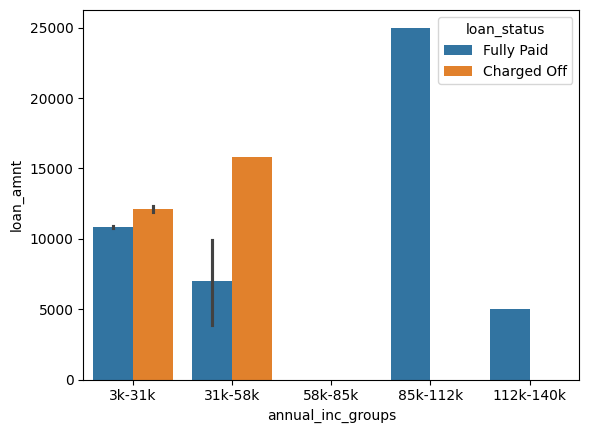

In [40]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = df)
plt.show()

#### Annual Income vs Int rate

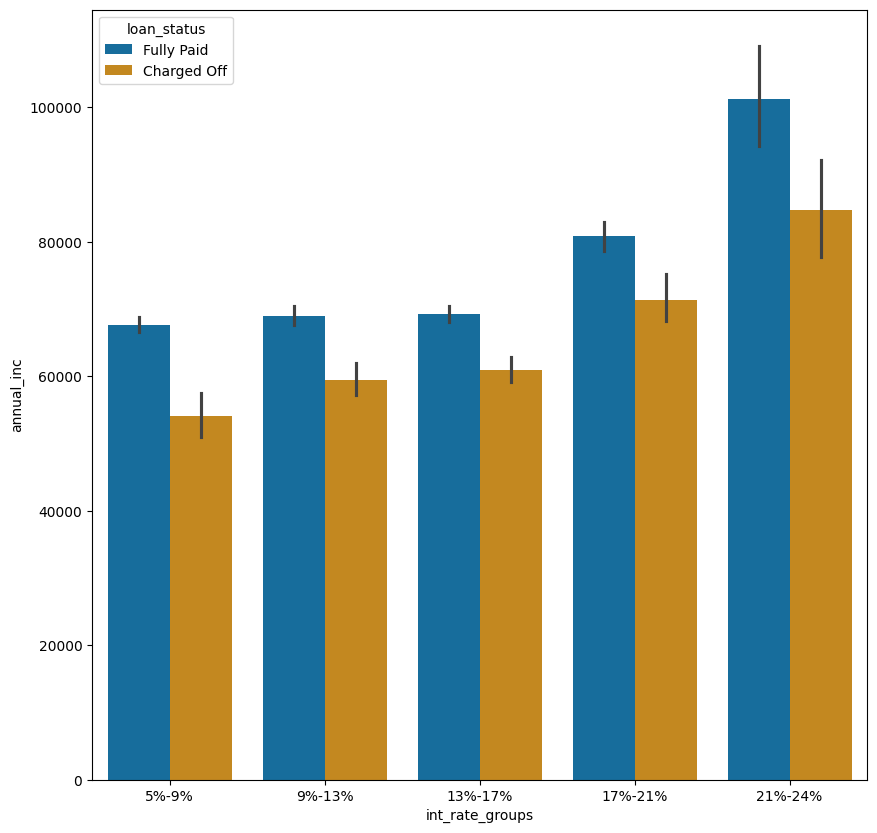

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

#### Loan Amount vs Interest Rate

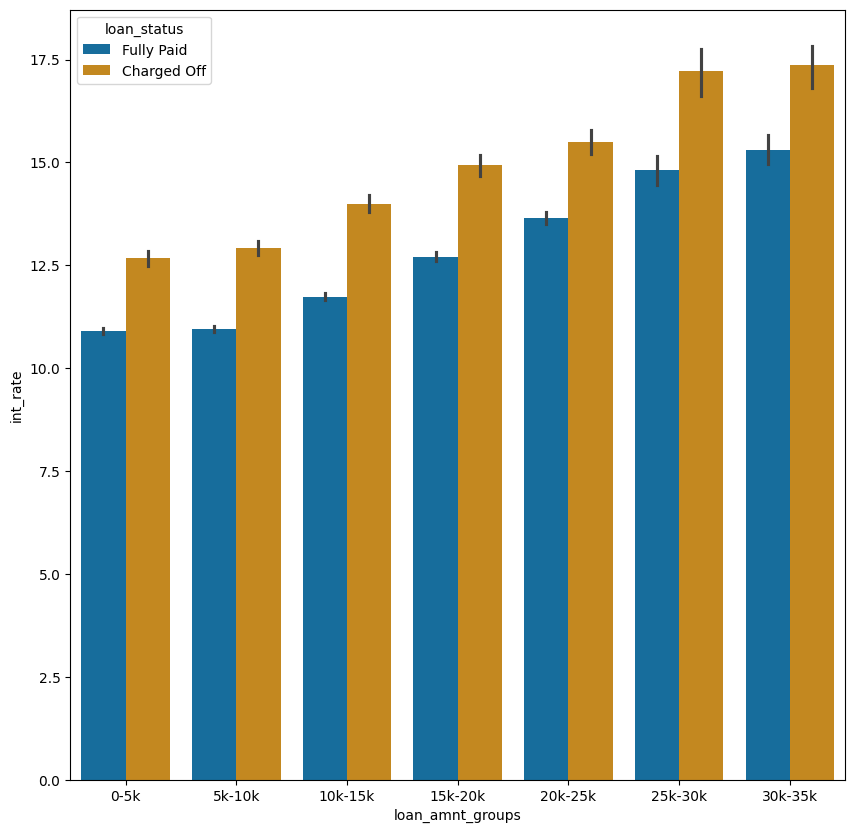

In [53]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="colorblind")
plt.show()

#### Annual income vs loan purpose

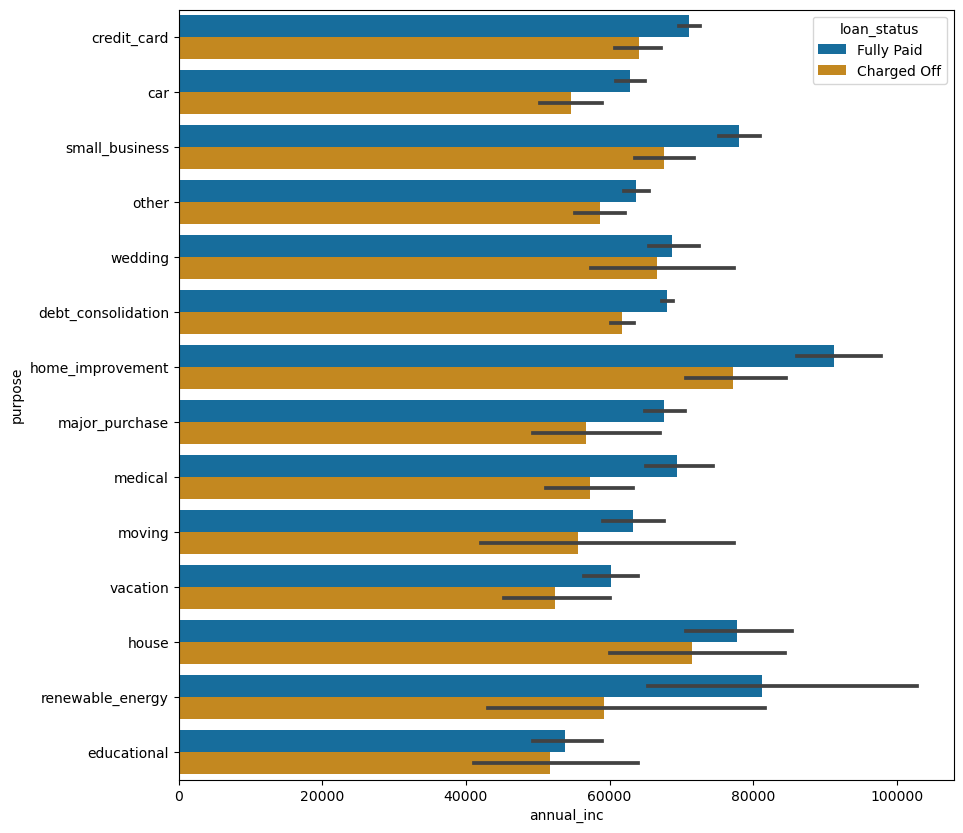

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="colorblind")
plt.show()
df.loan_status.unique()
#observation : default when home_improvement and income between 60-80K

#### Annual income vs home ownership

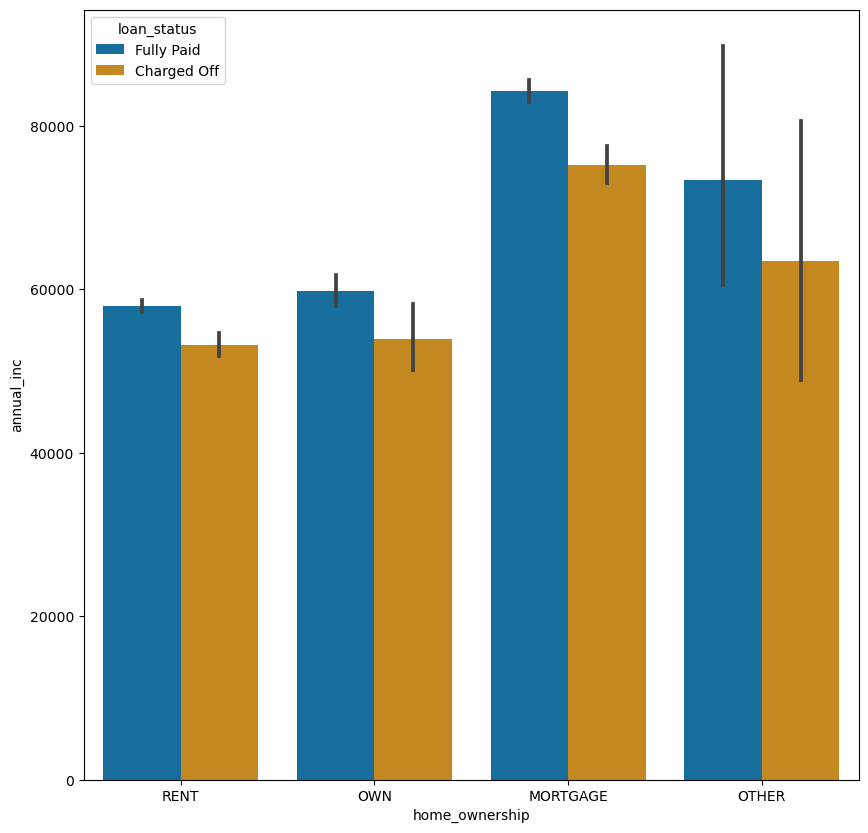

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

### Observations

#### High Charged off or default rates with below combination.
- annual income vs loan_amnt: betwen 30-35K with interest rate between 15 to 17.5 (higher side)
- annual income vs int rate: interest rate between 21-24% and income > 80K. 
- loan amount vs int rate : loan amount between 30-35K and interest rate between 16 to 17.5%
- annual income vs purpose: with home_improvement and annual income between 60 to 80K
- annual income vs home ownership : ownership type Mortgage and income between 70-80K

## Multivariate Analysis

In [52]:
#, "int_rate","annual_inc","open_acc","revol_util","total_acc","installment","funded_amnt"
loan_status = df.groupby(by=["loan_status","grade","sub_grade","annual_inc_groups","int_rate_groups","loan_amnt_groups", "term", "purpose"])[["loan_amnt","int_rate","annual_inc","open_acc","revol_util","total_acc","installment","funded_amnt"]].count().reset_index()
loan_status = loan_status[(loan_status.loan_status == "Charged Off")].sort_values(by="loan_amnt",ascending=False)
loan_status.rename(columns={'loan_amnt': 'loan_amnt_count', 'int_rate': 'int_rate_count',"annual_inc" : "annual_inc_count","open_acc":"open_acc_count","revol_util" : "revol_util_count","total_acc" : "total_acc_count","installment" : "installment_count","funded_amnt" : "funded_amnt_count"}, inplace=True)
loan_status["chargeoff_percentage"] = 100 * (loan_status.loan_amnt_count/loan_status.loan_amnt_count.sum())
loan_status.head(100)


,loan_status,grade,sub_grade,annual_inc_groups,int_rate_groups,loan_amnt_groups,term,purpose,loan_amnt_count,int_rate_count,annual_inc_count,open_acc_count,revol_util_count,total_acc_count,installment_count,funded_amnt_count,chargeoff_percentage
34526,Charged Off,B,3,3k-31k,9%-13%,5k-10k,36,debt_consolidation,42,42,42,42,42,42,42,42,0.746401
44326,Charged Off,B,5,3k-31k,9%-13%,5k-10k,36,debt_consolidation,41,41,41,41,41,41,41,41,0.728630
73922,Charged Off,D,1,3k-31k,13%-17%,5k-10k,36,debt_consolidation,40,40,40,40,40,40,40,40,0.710858
44298,Charged Off,B,5,3k-31k,9%-13%,0-5k,36,debt_consolidation,32,32,32,32,32,32,32,32,0.568687
78822,Charged Off,D,2,3k-31k,13%-17%,5k-10k,36,debt_consolidation,29,29,29,29,29,29,29,29,0.515372
34554,Charged Off,B,3,3k-31k,9%-13%,10k-15k,36,debt_consolidation,29,29,29,29,29,29,29,29,0.515372
39426,Charged Off,B,4,3k-31k,9%-13%,5k-10k,36,debt_consolidation,28,28,28,28,28,28,28,28,0.497601
19630,Charged Off,A,5,3k-31k,5%-9%,5k-10k,36,debt_consolidation,26,26,26,26,26,26,26,26,0.462058
34498,Charged Off,B,3,3k-31k,9%-13%,0-5k,36,debt_consolidation,26,26,26,26,26,26,26,26,0.462058
14730,Charged Off,A,4,3k-31k,5%-9%,5k-10k,36,debt_consolidation,26,26,26,26,26,26,26,26,0.462058


### Observations

#### Although in bivariate analysis we have seen observations but if we compare it with Multivariate analysis, we can take intersection of common points

- For a loan grade B, and sub grade 3 or 5, with annual income between -31k and loan amount 5-10K, purpose = debt_consolidation, it is having highest failure percentage, close to 1%